In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emojiremovedcsv/file3.csv
/kaggle/input/lemmetizedtweets/lemmatized_tweets.csv
/kaggle/input/bitcoin-tweets-16m-tweets-with-sentiment-tagged/mbsa.csv
/kaggle/input/bitcoindata/BTC-USD.csv
/kaggle/input/glove6b100dtxt/glove.6B.100d.txt


<h1 align="center">Bitcoin Data Pre-Processing:</h1>

In [15]:
# Importing Data:
btc_data = pd.read_csv(r"/kaggle/input/bitcoindata/BTC-USD.csv")
btc_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [16]:
# Taking the Opening Prices:
btc_open = btc_data["Open"]
btc_open

0         465.864014
1         456.859985
2         424.102997
3         394.673004
4         408.084991
            ...     
3097    20187.876953
3098    20628.029297
3099    22156.406250
3100    24201.765625
3101    24734.652344
Name: Open, Length: 3102, dtype: float64

In [17]:
btc_open.shape

(3102,)

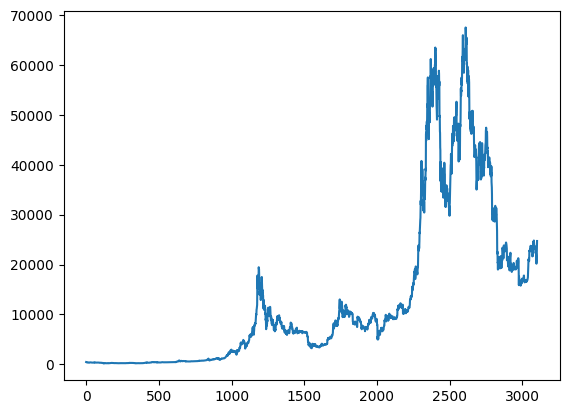

In [18]:
import matplotlib.pyplot as pyplot
pyplot.plot(btc_open)

### Applying MinMax Scaler to Opening Prices of Bitcoin, which scales the values from 0 to 1.

In [19]:
# Applying MinMax Scaler:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
btc_open = scaler.fit_transform(np.array(btc_open).reshape(-1, 1))
btc_open

array([[0.00428907],
       [0.00415543],
       [0.00366922],
       ...,
       [0.32623695],
       [0.35659577],
       [0.36450529]])

### Splitting data into training and testing:

In [20]:
# Splitting Data into Training and Testing:
train_data_size = int(len(btc_open) * 0.7)
test_data_size = len(btc_open) - train_data_size

train_data, test_data = btc_open[0:train_data_size, :], btc_open[train_data_size:len(btc_open), :1]

In [21]:
# Converting an Array of values into a Matrix of Dataset:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    
    return np.array(dataX), np.array(dataY)

In [22]:
# time_step gives the number of days the Model will consider:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [23]:
X_train

array([[0.00428907, 0.00415543, 0.00366922, ..., 0.00230241, 0.00233756,
        0.00215798],
       [0.00415543, 0.00366922, 0.0032324 , ..., 0.00233756, 0.00215798,
        0.00211146],
       [0.00366922, 0.0032324 , 0.00343147, ..., 0.00215798, 0.00211146,
        0.0022366 ],
       ...,
       [0.14185827, 0.13590556, 0.13652435, ..., 0.17194768, 0.17367725,
        0.16933502],
       [0.13590556, 0.13652435, 0.14098854, ..., 0.17367725, 0.16933502,
        0.17073348],
       [0.13652435, 0.14098854, 0.14175099, ..., 0.16933502, 0.17073348,
        0.1704959 ]])

In [24]:
# Reshaping the Inputs:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [25]:
print(X_test.shape), print(Y_test.shape)

(830, 100, 1)
(830,)


(None, None)

### Creating the DL Model. 
### The model is a Sequential model consisting of 4 layers (3 LSTM layers + 1 Dense Layer):

In [26]:
# Creating the Stacked LSTM Model:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(75, return_sequences=True))
model.add(LSTM(75))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 100)          40800     
                                                                 
 lstm_4 (LSTM)               (None, 100, 75)           52800     
                                                                 
 lstm_5 (LSTM)               (None, 75)                45300     
                                                                 
 dense_1 (Dense)             (None, 1)                 76        
                                                                 
Total params: 138,976
Trainable params: 138,976
Non-trainable params: 0
_________________________________________________________________


## Running the Model on Data:

In [30]:
# Running the Model:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=64, verbose=1)

Epoch 1/50
33/33 [==============================] - 14s 253ms/step - loss: 9.6314e-04 - val_loss: 0.0042
Epoch 2/50
33/33 [==============================] - 7s 226ms/step - loss: 1.5077e-04 - val_loss: 0.0082
Epoch 3/50
33/33 [==============================] - 7s 225ms/step - loss: 1.3667e-04 - val_loss: 0.0099
Epoch 4/50
33/33 [==============================] - 7s 226ms/step - loss: 1.2006e-04 - val_loss: 0.0119
Epoch 5/50
33/33 [==============================] - 7s 227ms/step - loss: 1.2066e-04 - val_loss: 0.0131
Epoch 6/50
33/33 [==============================] - 7s 228ms/step - loss: 1.1797e-04 - val_loss: 0.0260
Epoch 7/50
33/33 [==============================] - 7s 226ms/step - loss: 1.3058e-04 - val_loss: 0.0282
Epoch 8/50
33/33 [==============================] - 7s 226ms/step - loss: 1.0043e-04 - val_loss: 0.0153
Epoch 9/50
33/33 [==============================] - 7s 222ms/step - loss: 8.6980e-05 - val_loss: 0.0191
Epoch 10/50
33/33 [==============================] - 7s 227ms/s

In [19]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

26/26 [==============================] - 0s 7ms/step


In [20]:
# train_predict = scaler.inverse_transform(train_predict)
# test_predict = scaler.inverse_transform(test_predict)

### Mean Squared Error on Training Dataset:

In [21]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(Y_train, train_predict))

0.005510166845930547

### Mean Squared Error on Test Dataset:

In [22]:
math.sqrt(mean_squared_error(Y_test, test_predict))

0.058304735269326564

In [18]:
# plotting train predictions
look_back = 100
train_predict_plot = np.empty_like(btc_open)
train_predict_plot[:,:] = np.nan
train_predict_plot[look_back : len(train_predict)+look_back, :] = train_predict
# plotting test predictions
test_predict_plot = np.empty_like(btc_open)
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1 : len(btc_open)-1, :] = test_predict
# plotting baselines and predictions
pyplot.plot(btc_open)
pyplot.plot(train_predict_plot)
pyplot.plot(test_predict_plot)
pyplot.show()

NameError: name 'train_predict' is not defined

<h1 align="center">Tweet Data Pre-Processing:</h1>

In [4]:
import re
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

### Loading the Tweet Dataset:

In [5]:
# NLP Starts here:
tweets = pd.read_csv(r"/kaggle/input/bitcoin-tweets-16m-tweets-with-sentiment-tagged/mbsa.csv")
tweets.head()

,Date,text,Sentiment
0,2019-05-27,È appena uscito un nuovo video! LES CRYPTOMONN...,Positive
1,2019-05-27,Cardano: Digitize Currencies; EOS https://t.co...,Positive
2,2019-05-27,Another Test tweet that wasn't caught in the s...,Positive
3,2019-05-27,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,Positive
4,2019-05-27,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,Positive


In [4]:
tweets.shape

(19344048, 3)

In [5]:
tweets.isnull().values.any()

True

In [6]:
tweets = tweets.dropna()

In [7]:
tweets.shape

(18452904, 3)

In [39]:
length = tweets.shape[0]
length

18452904

## Filtering Out Non-English Tweets:

In [48]:
from langdetect import detect

for i in tqdm(range(int(length / 100))):
    try:
        if detect(tweets.text[i]) != 'en':
            tweets.drop(i)
    except:
        tweets.drop(i)

  0%|          | 22/184529 [00:21<49:50:36,  1.03it/s]

KeyboardInterrupt



In [44]:
tweets.text[22]

'🤣🤣🤣'

In [ ]:
# import pandas as pd
# import langid

# # Function to check if tweet is non-English
# def is_non_english(tweet):
#     lang = langid.classify(tweet)[0]
#     return lang != 'en'

# # Drop non-English tweets from the DataFrame
# # tweets.drop(tweets[tweets["text"].apply(is_non_english)].index, inplace=True)


# tweets.head()

In [49]:
!pip install langid

In [52]:
import langid

for i in tqdm(range(length)):
    lang = langid.classify(tweets.text[i])
    if lang[0] != 'en':
        tweets.drop(i)

tweets.shape

  0%|          | 2961/18452904 [43:37<4530:37:13,  1.13it/s] 

Unexpected exception formatting exception. Falling back to standard exception



Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_34/3843470823.py", line -1, in <module>
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2102, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/opt/conda/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1310, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/opt/conda/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1199, in structured_traceback
    return VerboseTB.structured_traceback(
  File "/opt/conda/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1052, in structured_traceback
    formatted_exception = self.format_exc

### Creating the "counts" column, which gives the number of tweets for a particular day:

In [ ]:
arr = []
count = 1
arr.append(count)

for i in range(1, length):
    if tweets["Date"][i] == tweets["Date"][i - 1]:
        count += 1
    else:
        count = 1
    arr.append(count)

In [ ]:
arr = np.array(arr)
arr.shape

In [ ]:
tweets["counts"] = arr

### Trimming the Dataset. We are retaining 250 Tweets per Day.

In [ ]:
tweets.drop(tweets[tweets["counts"] > 250].index, inplace = True)

In [ ]:
tweets.reset_index(inplace = True, drop = True)
tweets.head(252)

In [ ]:
length = tweets["text"].shape[0]
length

In [ ]:
# Save the Trimmed Datset:
tweets.to_csv("trimmedTweets.csv")

## Removing URLs from the Tweets:

In [11]:
from tqdm import tqdm

In [12]:
for i in tqdm(range(length)):
    tweet = re.sub(r"http\S+", " ", str(tweets["text"][i]))
    tweets["text"][i] = tweet

tweets.head(10)

  0%|          | 0/474298 [00:00<?, ?it/s]/tmp/ipykernel_34/1215118418.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets["text"][i] = tweet
100%|██████████| 474298/474298 [1:06:56<00:00, 118.09it/s]


,Date,text,Sentiment,counts
0,2019-05-27,È appena uscito un nuovo video! LES CRYPTOMONN...,Positive,1
1,2019-05-27,Cardano: Digitize Currencies; EOS 6500% ROI;...,Positive,2
2,2019-05-27,Another Test tweet that wasn't caught in the s...,Positive,3
3,2019-05-27,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,Positive,4
4,2019-05-27,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,Positive,5
5,2019-05-27,#btc inceldiği yerden kopsun bakalım 17:00 ye ...,Positive,6
6,2019-05-27,@nwoodfine We have been building on the real #...,Positive,7
7,2019-05-27,"@pedronauck como investidor, vc é um ótimo dev...",Positive,8
8,2019-05-27,ブラジルはまぁ置いといてもドイツは存在感出してくるのかな。ロシアもマイニングなどで元気になる...,Positive,9
9,2019-05-27,"CHANGE IS COMING...GET READY!!! Boom, Another ...",Positive,10


## Removing Emojis from Tweets:

In [13]:
def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+",
         flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", string)

In [14]:
for i in tqdm(range(length)):
    tweet = remove_emoji(str(tweets["text"][i]))
    tweets["text"][i] = tweet

tweets.head(10)

  0%|          | 0/474298 [00:00<?, ?it/s]/tmp/ipykernel_34/3942486918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets["text"][i] = tweet
  0%|          | 1105/474298 [00:09<1:08:09, 115.71it/s]


KeyboardInterrupt: 

## Translation of Tweets to English:

In [13]:
!pip install -U deep-translator

In [14]:
from deep_translator import GoogleTranslator
from tqdm import tqdm

In [15]:
import pandas as pd
tweets = pd.read_csv(r"/kaggle/input/emojiremovedcsv/file3.csv")

In [16]:
tweets.head(10)

,Unnamed: 0,index,Date,text,Sentiment,counts
0,0,0,2019-05-27,appena uscito un nuovo video les cryptomonnaie...,Positive,1
1,1,1,2019-05-27,cardano digitize currencies eos roi at amp t b...,Positive,2
2,2,2,2019-05-27,another test tweet that wasn t caught in the s...,Positive,3
3,3,3,2019-05-27,current crypto prices btc usd eth usd ltc usd ...,Positive,4
4,4,4,2019-05-27,spiv nosar baz bitcoin is an asset amp not a c...,Positive,5
5,5,5,2019-05-27,btc inceldi i yerden kopsun bakal m ye kadar b...,Positive,6
6,6,6,2019-05-27,nwoodfine we have been building on the real bi...,Positive,7
7,7,7,2019-05-27,pedronauck como investidor vc um timo dev sort...,Positive,8
8,8,8,2019-05-27,NaN,Positive,9
9,9,9,2019-05-27,change is coming get ready boom another cb jab...,Positive,10


In [17]:
# Performing Translation on all the Tweets:
length = 474298
for i in tqdm(range(int(length / 2))):
    tweet = GoogleTranslator(source='auto', target='en').translate(str(tweets.text[i]))
    tweets.text[i] = tweet

tweets.head(10)

  0%|          | 0/237149 [00:00<?, ?it/s]/tmp/ipykernel_34/719720335.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets.text[i] = tweet
  1%|          | 2064/237149 [04:43<8:57:57,  7.28it/s] 


KeyboardInterrupt: 

In [ ]:
# Writing to csv:
tweets.to_csv("translated.csv")

## Stopwords Removal:

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('wordnet')
nltk.download('stopwords')

In [ ]:
englishStopwords = stopwords.words('english')

In [4]:
# Reading the File:
# Necessary only when running again:
tweets = []
file = open(r"/kaggle/input/file1emojiremoved/file1.txt", 'r')
for tweet in file:
    tweets.append(tweet)

# tweets

In [5]:
for i in range(length):
    tokens = word_tokenize(tweets["text"][i].lower())
#     tokens = word_tokenize(tweets[i].lower())
    tokensWOStop = [t for t in tokens if t not in englishStopwords]
    tweet = " ".join(tokensWOStop)
    tweets["text"][i] = tweet
#     tweets[i] = tweet


tweets.head(10)

NameError: name 'length' is not defined

## Lemmetization:

In [ ]:
lemm = WordNetLemmatizer()

In [ ]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

In [ ]:
for i in range(length):
    tweet = re.sub('[^a-zA-Z]', " ", tweets["text"][i])
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [lemm.lemmatize(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = " ".join(tweet)
    tweets["text"][i] = tweet

tweets.head(10)

## GloVe:

In [3]:
# Open the Lemmetized Tweets File:
import pandas as pd
tweets = pd.read_csv(r"/kaggle/input/lemmetizedtweets/lemmatized_tweets.csv")

In [4]:
tweets.head()

,Unnamed: 0.1,Unnamed: 0,index,Date,text,Sentiment,counts
0,0,0,0,2019-05-27,appena uscito un nuovo video le cryptomonnaies...,Positive,1
1,1,1,1,2019-05-27,cardano digitize currency eos roi amp bitcoin ...,Positive,2
2,2,2,2,2019-05-27,another test tweet caught stream bitcoin,Positive,3
3,3,3,3,2019-05-27,current crypto price btc usd eth usd ltc usd b...,Positive,4
4,4,4,4,2019-05-27,spiv nosar baz bitcoin asset amp currency,Positive,5


In [5]:
tweets.shape

(468736, 7)

<AxesSubplot: xlabel='Sentiment', ylabel='count'>

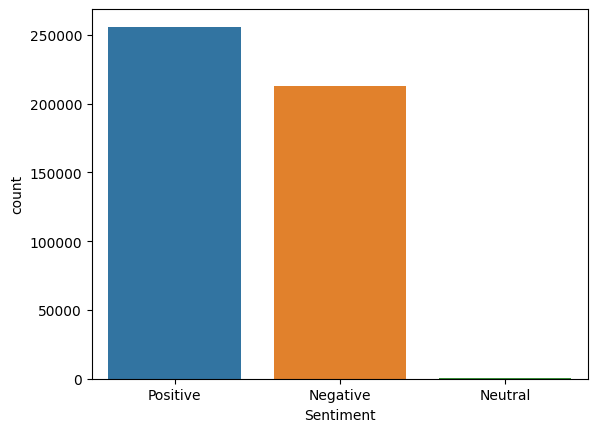

In [6]:
# Test:
# Let's observe distribution of positive / negative sentiments in dataset

import seaborn as sns
sns.countplot(x='Sentiment', data=tweets)

In [7]:
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

In [8]:
X = []
sentences = list(tweets["text"])
for sen in sentences:
    X.append(sen)

In [9]:
len(X)

468736

In [10]:
from tqdm import tqdm
for i in tqdm(range(len(X))):
    X[i] = str(X[i])

100%|██████████| 468736/468736 [00:00<00:00, 2183800.82it/s]


In [11]:
# Converting sentiment labels to 0 & 1
from tqdm import tqdm

y = tweets["Sentiment"]

for i in tqdm(range(len(y))):
    sentiment = y[i].lower()
    if sentiment == "positive":
        y[i] = 1
    elif sentiment == "negative":
        y[i] = -1
    elif sentiment == "neutral":
        y[i] = 0
y

  0%|          | 0/468736 [00:00<?, ?it/s]/tmp/ipykernel_34/1336387523.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = 1
  0%|          | 222/468736 [00:00<18:21, 425.21it/s]/tmp/ipykernel_34/1336387523.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = -1
  3%|▎         | 15023/468736 [00:33<16:46, 450.81it/s]


KeyboardInterrupt: 

In [ ]:
import numpy as np
y = np.array(list(y))
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
print(len(X_train))
print(len(y_train))

In [13]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

NameError: name 'X_train' is not defined

In [ ]:
print(len(X_train))
print(len(y_train))

In [ ]:
import io
import json

In [22]:
# Saving
tokenizer_json = word_tokenizer.to_json()
with io.open('b3_tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [12]:
# Adding 1 to store dimensions for words for which no pretrained word embeddings exist

vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

NameError: name 'word_tokenizer' is not defined

In [24]:
from keras.utils import pad_sequences

In [25]:
# Padding all reviews to fixed length 100

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [26]:
# Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open(r"/kaggle/input/glove6b100dtxt/glove.6B.100d.txt", encoding="utf8")

for line in tqdm(glove_file):
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

400000it [00:11, 36287.71it/s]


In [27]:
# Create Embedding Matrix having 100 columns 
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [28]:
embedding_matrix.shape

(116625, 100)

## LSTM

In [1]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, Dropout, LSTM
from keras.layers.core import Dense

In [30]:
# Neural Network architecture

# lstm_model = Sequential()
# embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

# lstm_model.add(embedding_layer)
# lstm_model.add(LSTM(64, return_sequences=True))
# lstm_model.add(LSTM(32))


# lstm_model.add(Dense(1, activation="softmax"))

In [2]:
lstm_model = Sequential([
    Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False),
    LSTM(128),
    Dense(512, activation="relu"),
    Dropout(0.50),
    Dense(1, activation="softmax")
])

NameError: name 'vocab_length' is not defined

In [43]:
# Model compiling

lstm_model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['acc'])
print(lstm_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 100)          11662500  
                                                                 
 lstm_5 (LSTM)               (None, 128)               117248    
                                                                 
 dense_4 (Dense)             (None, 512)               66048     
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 11,846,309
Trainable params: 11,846,309
Non-trainable params: 0
_________________________________________________________________
None


In [45]:
# Model Training

lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=256, epochs=200, verbose=1, validation_split=0.2)

Epoch 1/200
1172/1172 [==============================] - 61s 52ms/step - loss: 0.0000e+00 - acc: 0.5452 - val_loss: 0.0000e+00 - val_acc: 0.5466
Epoch 2/200
1172/1172 [==============================] - 28s 24ms/step - loss: 0.0000e+00 - acc: 0.5452 - val_loss: 0.0000e+00 - val_acc: 0.5466
Epoch 3/200
1172/1172 [==============================] - 27s 23ms/step - loss: 0.0000e+00 - acc: 0.5452 - val_loss: 0.0000e+00 - val_acc: 0.5466
Epoch 4/200
1172/1172 [==============================] - 25s 22ms/step - loss: 0.0000e+00 - acc: 0.5452 - val_loss: 0.0000e+00 - val_acc: 0.5466
Epoch 5/200
1172/1172 [==============================] - 23s 19ms/step - loss: 0.0000e+00 - acc: 0.5452 - val_loss: 0.0000e+00 - val_acc: 0.5466
Epoch 6/200
1172/1172 [==============================] - 23s 20ms/step - loss: 0.0000e+00 - acc: 0.5452 - val_loss: 0.0000e+00 - val_acc: 0.5466
Epoch 7/200
1172/1172 [==============================] - 23s 20ms/step - loss: 0.0000e+00 - acc: 0.5452 - val_loss: 0.0000e+00 - v

In [46]:
# Predictions on the Test Set

score = lstm_model.evaluate(X_test, y_test, verbose=1)

2930/2930 [==============================] - 15s 5ms/step - loss: 0.0000e+00 - acc: 0.5480


In [47]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.0
Test Accuracy: 0.5480223298072815


## Word2Vec:

In [115]:
from tqdm import tqdm

In [112]:
import gensim
from gensim.models import Word2Vec, KeyedVectors

In [116]:
tweetsArr = []
for i in tqdm(range(length)):
    tweetsArr.append(tweets.text[i])

100%|██████████| 474298/474298 [00:05<00:00, 80482.90it/s]


In [90]:
reviewTweets = tweets.text.apply(gensim.utils.simple_preprocess)
reviewTweets

0         [appena, uscito, un, nuovo, video, le, cryptom...
1         [cardano, digitize, currency, eos, roi, amp, b...
2           [another, test, tweet, caught, stream, bitcoin]
3         [current, crypto, price, btc, usd, eth, usd, l...
4         [spiv, nosar, baz, bitcoin, asset, amp, currency]
                                ...                        
474293                                    [xmr, worth, btc]
474294    [eurjpy, usdjpy, spx, usdtry, eurusd, gbpusd, ...
474295    [beautiful, close, yesterday, weekly, front, r...
474296    [one, bitcoin, biggest, holder, moved, btc, wo...
474297    [top, alert, time, bitcoin, ethereum, xrp, tet...
Name: text, Length: 474298, dtype: object

In [117]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [ ]:
words = []
for sent in corpus:
    sent_token = sent_tokenize(str(sent))
    for sent in sent_token:
        words.append(simple_preprocess(sent))

# words

In [ ]:
model = Word2Vec(words, vector_size=300, epochs=50)

In [122]:
print("Model Corpus Count: ", model.corpus_count)
print("Model Epochs Count: ", model.epochs)

Model Corpus Count:  474298
Model Epochs Count:  5


In [124]:
words[0]

['appena',
 'uscito',
 'un',
 'nuovo',
 'video',
 'le',
 'cryptomonnaies',
 'qui',
 'pulv',
 'risent',
 'bitcoin',
 'en']

In [126]:
def avg_word2vec(doc):
    return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)

In [127]:
#apply for the entire sentences
import numpy as np
X = []
for i in tqdm(range(len(words))):
    X.append(avg_word2vec(words[i]))

  0%|          | 0/474298 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 474298/474298 [06:22<00:00, 1240.31it/s]


In [128]:
len(X)

474298

In [135]:
X_new = np.array(X)

/tmp/ipykernel_35/537637426.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_new = np.array(X)


In [136]:
X_new

array([array([ 0.903478  ,  0.83565044,  0.9288008 , -0.11484777, -1.0972503 ,
               0.16425419,  0.5526456 ,  0.3339622 ,  0.08428954,  0.9129788 ,
              -0.28525722, -0.7596643 , -0.10762516, -0.35503826,  0.04620512,
              -0.23888902, -0.46619147, -1.6612691 , -0.35199907, -0.551941  ,
               1.5091709 ,  0.36852747,  0.70072967,  0.39057893,  0.23273745,
              -0.48355168, -0.84841365,  0.34969193,  0.62043786,  0.8946779 ,
               0.6360074 ,  1.2078153 , -0.33433935, -0.46011904,  0.44449204,
               0.99291366,  0.27848983, -0.2152849 , -0.44372803, -0.8865893 ,
               0.04456744, -0.55811733, -0.8653326 , -0.10103273,  0.847164  ,
               0.39368558, -0.26800248,  1.0817347 , -0.89721334,  0.8674593 ,
               0.9826784 , -0.8026019 ,  0.513096  , -0.6222254 , -1.2033867 ,
               0.74580574, -0.18482794, -0.57970697, -0.74011374,  0.04715485,
              -0.04725309,  1.1618063 , -1.2693535 ,

In [137]:
X_new[0]

array([ 0.903478  ,  0.83565044,  0.9288008 , -0.11484777, -1.0972503 ,
        0.16425419,  0.5526456 ,  0.3339622 ,  0.08428954,  0.9129788 ,
       -0.28525722, -0.7596643 , -0.10762516, -0.35503826,  0.04620512,
       -0.23888902, -0.46619147, -1.6612691 , -0.35199907, -0.551941  ,
        1.5091709 ,  0.36852747,  0.70072967,  0.39057893,  0.23273745,
       -0.48355168, -0.84841365,  0.34969193,  0.62043786,  0.8946779 ,
        0.6360074 ,  1.2078153 , -0.33433935, -0.46011904,  0.44449204,
        0.99291366,  0.27848983, -0.2152849 , -0.44372803, -0.8865893 ,
        0.04456744, -0.55811733, -0.8653326 , -0.10103273,  0.847164  ,
        0.39368558, -0.26800248,  1.0817347 , -0.89721334,  0.8674593 ,
        0.9826784 , -0.8026019 ,  0.513096  , -0.6222254 , -1.2033867 ,
        0.74580574, -0.18482794, -0.57970697, -0.74011374,  0.04715485,
       -0.04725309,  1.1618063 , -1.2693535 ,  0.69009244,  0.10994409,
        0.82013553, -0.10069525, -1.0866612 , -0.6462254 ,  0.92

In [138]:
X_new.shape

(474298,)

In [1]:
df = pd.DataFrame()

for i in tqdm(range(0, len(X))):
    df=df.append(pd.DataFrame(X_new[i].reshape(1,-1)), ignore_index=True)

NameError: name 'pd' is not defined

In [ ]:
df.to_csv('wordtovec.csv')

## roBERTa Model:

In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [2]:
# Loading Lemmetized tweets:
import pandas

lemmTweets = pandas.read_csv(r"/kaggle/input/lemmetizedtweets/lemmatized_tweets.csv")
lemmTweets.head(10)

,Unnamed: 0.1,Unnamed: 0,index,Date,text,Sentiment,counts
0,0,0,0,2019-05-27,appena uscito un nuovo video le cryptomonnaies...,Positive,1
1,1,1,1,2019-05-27,cardano digitize currency eos roi amp bitcoin ...,Positive,2
2,2,2,2,2019-05-27,another test tweet caught stream bitcoin,Positive,3
3,3,3,3,2019-05-27,current crypto price btc usd eth usd ltc usd b...,Positive,4
4,4,4,4,2019-05-27,spiv nosar baz bitcoin asset amp currency,Positive,5
5,5,5,5,2019-05-27,btc inceldi yerden kopsun bakal ye kadar bir h...,Positive,6
6,6,6,6,2019-05-27,nwoodfine building real bitcoin sv building br...,Positive,7
7,7,7,7,2019-05-27,pedronauck como investidor vc um timo dev sort...,Positive,8
8,8,9,9,2019-05-27,change coming get ready boom another cb jab no...,Positive,10
9,9,10,10,2019-05-27,one useful article stefan guide run ltonetwork...,Positive,11


In [3]:
roberta = "cardiffnlp/twitter-roberta-base-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer = AutoTokenizer.from_pretrained(roberta)

In [4]:
labels = ["Negative", "Neutral", "Positive"]
negative = []
neutral = []
positive = []

In [5]:
def polarityScore(tweet):
    encodedTweet = tokenizer(tweet, return_tensors='pt')
    
    sentiment = model(encodedTweet['input_ids'], encodedTweet['attention_mask'])
    score = sentiment[0][0].detach().numpy()
    score = softmax(score)
    
    negative.append(score[0])
    neutral.append(score[1])
    positive.append(score[2])

In [6]:
tweet = lemmTweets.text[2]
tweet

'another test tweet caught stream bitcoin'

In [7]:
encodedTweet = tokenizer(tweet, return_tensors='pt')
encodedTweet

{'input_ids': tensor([[    0, 30303,  1296,  3545,  2037,  4615, 11388,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}

In [8]:
sentiment = model(encodedTweet['input_ids'], encodedTweet['attention_mask'])
score = sentiment[0][0].detach().numpy()
score = softmax(score)
score

array([0.02265665, 0.9060466 , 0.07129662], dtype=float32)

In [9]:
len(lemmTweets.text)

468736

## Calling Polarity Score Function for all Tweets:

In [10]:
from tqdm import tqdm

for i in tqdm(range(len(lemmTweets.text))):
    tweet = str(lemmTweets.text[i])
    polarityScore(tweet)

  9%|▉         | 41229/468736 [56:13<10:18:17, 11.52it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 11%|█         | 50297/468736 [1:06:58<8:03:08, 14.43it/s] IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 16%|█▌        | 73000/468736 [1:37:37<9:15:46, 11.87it/s] IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variabl

In [12]:
import pandas as pd 
pd.DataFrame(negative).to_csv("negative.csv")
pd.DataFrame(neutral).to_csv("neutral.csv")
pd.DataFrame(positive).to_csv("positive.csv")

In [16]:
lemmTweets.head()

,Unnamed: 0.1,Unnamed: 0,index,Date,text,Sentiment,counts
0,0,0,0,2019-05-27,appena uscito un nuovo video le cryptomonnaies...,Positive,1
1,1,1,1,2019-05-27,cardano digitize currency eos roi amp bitcoin ...,Positive,2
2,2,2,2,2019-05-27,another test tweet caught stream bitcoin,Positive,3
3,3,3,3,2019-05-27,current crypto price btc usd eth usd ltc usd b...,Positive,4
4,4,4,4,2019-05-27,spiv nosar baz bitcoin asset amp currency,Positive,5


In [19]:
predictions = []

for i in tqdm(range(len(lemmTweets.text))):
    neg = negative[i]
    neu = neutral[i]
    pos = positive[i]
              
    if neg > neu and neg > pos:
        predictions.append("Negative")
    elif neu > neg and neu > pos:
        predictions.append("Neutral")
    else:
        predictions.append("Positive")

100%|██████████| 468736/468736 [00:00<00:00, 695256.25it/s]


In [21]:
lemmTweets["Predictions"] = predictions
lemmTweets.head(20)

,Unnamed: 0.1,Unnamed: 0,index,Date,text,Sentiment,counts,Predictions
0,0,0,0,2019-05-27,appena uscito un nuovo video le cryptomonnaies...,Positive,1,Neutral
1,1,1,1,2019-05-27,cardano digitize currency eos roi amp bitcoin ...,Positive,2,Neutral
2,2,2,2,2019-05-27,another test tweet caught stream bitcoin,Positive,3,Neutral
3,3,3,3,2019-05-27,current crypto price btc usd eth usd ltc usd b...,Positive,4,Neutral
4,4,4,4,2019-05-27,spiv nosar baz bitcoin asset amp currency,Positive,5,Neutral
5,5,5,5,2019-05-27,btc inceldi yerden kopsun bakal ye kadar bir h...,Positive,6,Neutral
6,6,6,6,2019-05-27,nwoodfine building real bitcoin sv building br...,Positive,7,Neutral
7,7,7,7,2019-05-27,pedronauck como investidor vc um timo dev sort...,Positive,8,Neutral
8,8,9,9,2019-05-27,change coming get ready boom another cb jab no...,Positive,10,Neutral
9,9,10,10,2019-05-27,one useful article stefan guide run ltonetwork...,Positive,11,Positive


In [26]:
count = 0
for i in tqdm(range(len(negative))):
    if lemmTweets.Sentiment[i] == lemmTweets.Predictions[i]:
        count += 1

100%|██████████| 468736/468736 [00:16<00:00, 28835.48it/s]


In [32]:
print(count)
print(lemmTweets.shape[0])

8797
468736
